In [3]:
import numpy as np
import pandas as pd
import math
import itertools
from sklearn.neighbors import DistanceMetric
import networkx as nx
from numpy import inf


In [ ]:
df = pd.read_csv("HeartFailure.csv")
df.head()

In [ ]:
df_cluster = df.iloc[:,1:13]

In [ ]:
#try1
g =[[1,2],[3,4],[5,6]]

aij = []
   
s = 1
R = 8

for pair in itertools.combinations(g,2):
    a = pair[0]
    b = pair[1]
    
    print(b)
    r = np.linalg.norm(a-b)
    
    for points in r:
        print(points)
        if points<R:
            c = [math.exp((np.linalg.norm(a-b) ** 2)/ 2*s**2)  for a, b in zip(a, b)]
        else:
            c = 0
        print(c)
    


# adj=math.exp(-abs(g[0][0]-g[1][0]) ** 2 / 2* 2**2)
# aij.append(adj)
# print (aij)
    
    
        

In [ ]:
#try 2
g =[[1,2],[6,4],[3,5]]
aij = [[0 for _ in range(len(g))] for _ in range(len(g))]
s= 0.4

for pair in itertools.combinations(g,2):
    a = np.array(pair[0])
    b = np.array(pair[1])
    
    dist = [math.exp((np.linalg.norm(a-b) ** 2)/ 2*s**2)  for a, b in zip(a, b)]
        
    aij.append(dist)
print(aij)
    
#     for points in r:
#         print(points)
#         if points<R:
#             c = [math.exp((np.linalg.norm(a-b) ** 2)/ 2*s**2)  for a, b in zip(a, b)]
#         else:
#             c = 0
#         print(c)


In [ ]:
#try 3
g =[[1,2],[6,4],[3,5]]
aij = []
c=[]

def adjacency(a,b):
    s= 0.4
    d = math.dist(a,b)
    function = math.exp((d)** 2)/ 2*s**2
    return d  
    

for pair in itertools.combinations(g,2):
    c.append(list(pair))
    
print(c)


aa = adjacency(c[0][0],c[0][0])
aij.append(aa)
ab = adjacency(c[0][0],c[0][1])
aij.append(ab)
ac = adjacency(c[0][0],c[2][1])
aij.append(ac)
ba = adjacency(c[0][0],c[0][1])
aij.append(ba)
bb = adjacency(c[0][1],c[0][1])
aij.append(bb)
bc = adjacency(c[0][0],c[2][1])
aij.append(bc)
ca = adjacency(c[2][1],c[0][0])
aij.append(ca)
cb = adjacency(c[2][1],c[0][1])
aij.append(cb)
cc = adjacency(c[2][1],c[2][1])
aij.append(cc)
aij



    
    
    
    

In [4]:
# construt the graph with adjacency matrix
g =[[1,2],[6,4],[3,5]]
df = pd.DataFrame(g, columns=['x','y'])
dist = DistanceMetric.get_metric('euclidean')
matrix_dist = dist.pairwise(df.to_numpy())
matrix_dist

C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


array([[0.        , 5.38516481, 3.60555128],
       [5.38516481, 0.        , 3.16227766],
       [3.60555128, 3.16227766, 0.        ]])

In [5]:
'equation for adjacency'
def equation(x):
    s = 0.1
    function = math.exp((x)** 2)/ 2*s**2
    return x  

In [9]:
# vectorize = np.vectorize(equation)
# adjacency_matrix = equation(matrix_dist)
# print(adjacency_matrix)

In [6]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

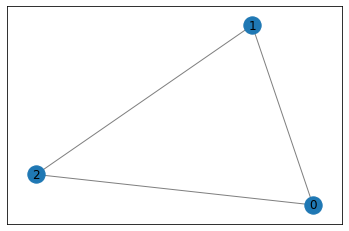

In [7]:
Graph=nx.from_numpy_matrix(matrix_dist)
draw_graph(Graph)

In [25]:
matrix_dist[1][1]
mat = np.array([0]*len(matrix_dist))
for row in matrix_dist:
    for point in row:
        point = equation(point)
matrix_dist
        
            
    


array([[0.        , 5.38516481, 3.60555128],
       [5.38516481, 0.        , 3.16227766],
       [3.60555128, 3.16227766, 0.        ]])

In [6]:
D = Graph.degree()
D

DegreeView({0: 2, 1: 2, 2: 2})

In [ ]:
degrees = [val for (node, val) in Graph.degree()]
# degree matrix
D = np.zeros((len(degrees), len(degrees)))
np.fill_diagonal(D, degrees)
print('degree matrix:')
print(D)

In [ ]:
L = D - matrix_dist
print(L)
LN = np.power(D,-0.5)* L* np.power(D,-0.5)
print('laplacian matrix:')
print(LN)

In [ ]:
e, v = np.linalg.eig(LN)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

In [ ]:
# Trying alternate methods
for i in range(0,len(matrix_dist)):
    matrix_dist[i][i]= adjacency(matrix_dist[i][i])
result = equation(matrix_dist[1][0])
result

In [ ]:
print(np.apply_along_axis(adjacency, axis=1, arr=matrix_dist))

In [ ]:
matrix_dist1 = np.array(list(map(adjacency,matrix_dist)))